In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# income
df = pd.read_csv("income_evaluation.csv")
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
print(df.dtypes)
print()
print('income - текст')

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

income - текст


In [29]:
df.isnull().any()
print('нет пустых значений')

нет пустых значений


' workclass' - категориальная переменная
значения: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


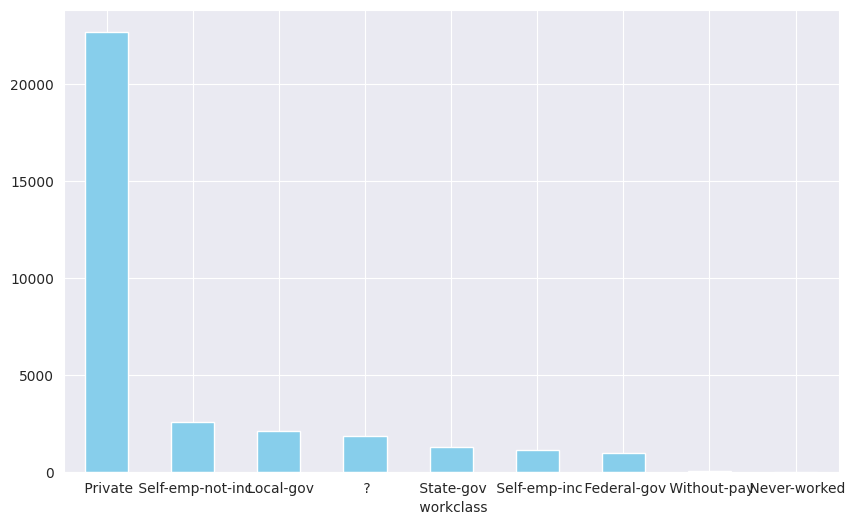

' marital-status' - категориальная переменная
значения: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


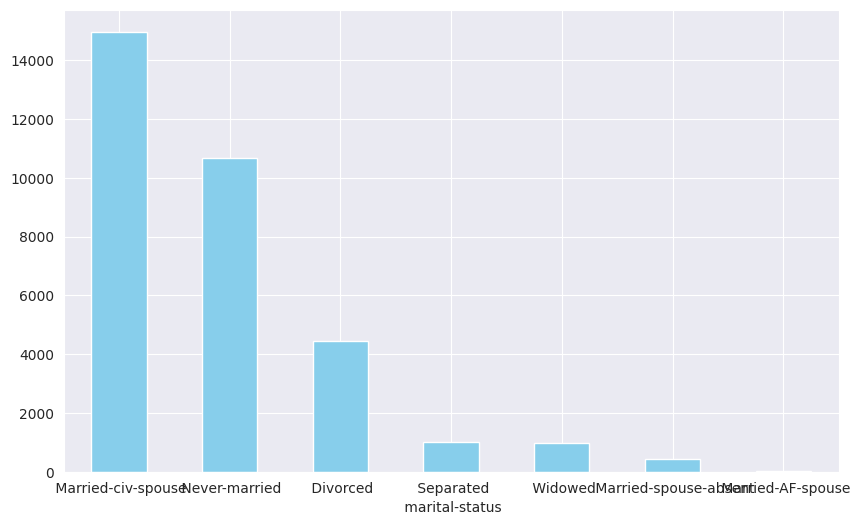

' relationship' - категориальная переменная
значения: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


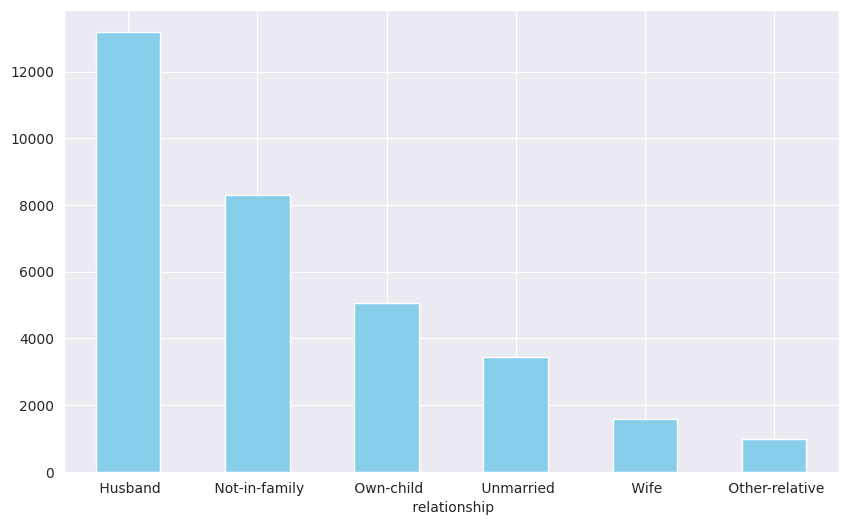

' race' - категориальная переменная
значения: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


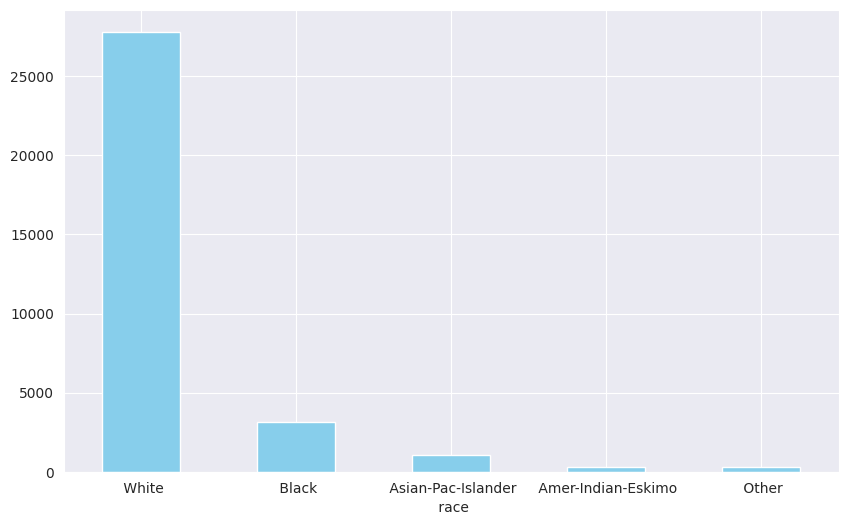

' sex' - категориальная переменная
значения: [' Male' ' Female']


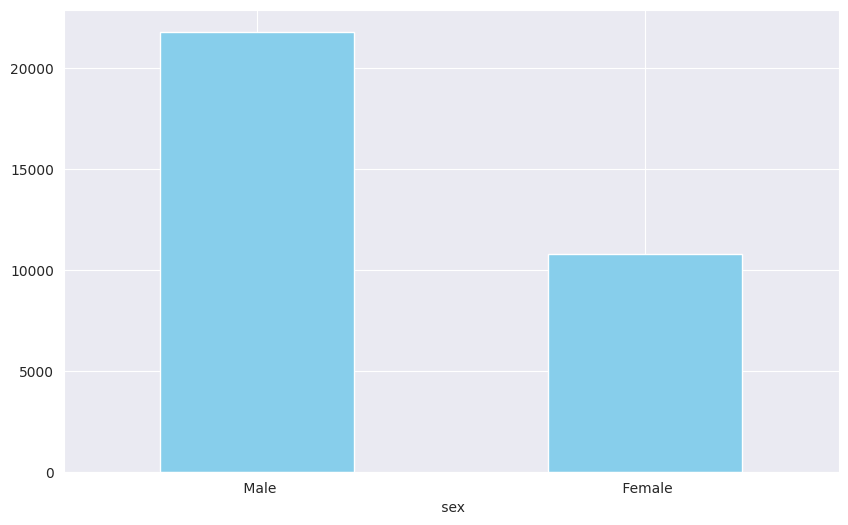

' income' - категориальная переменная
значения: [' <=50K' ' >50K']


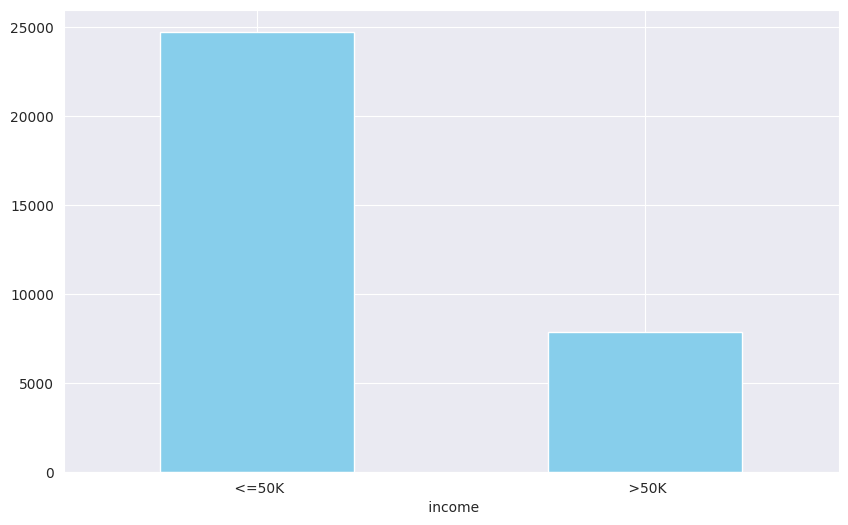

In [30]:
for i in df.columns:
    u = df[i].unique()
    if len(u) <= 10:
        print(f"'{i}' - категориальная переменная")
        print("значения:", u)
        print()
        plt.figure(figsize=(10, 6))
        df[i].value_counts().plot(kind='bar', color='skyblue')
        plt.xticks(rotation=0)
        plt.show()

ну по income: больше всего <=50k
остальное тоже видно

In [31]:
label_encoder = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = label_encoder.fit_transform(df[i])
        print(f"для столбца '{i}':")
        for code, value in enumerate(label_encoder.classes_):
            print(f"{code} - {value}")
    print()


для столбца ' workclass':
0 -  ?
1 -  Federal-gov
2 -  Local-gov
3 -  Never-worked
4 -  Private
5 -  Self-emp-inc
6 -  Self-emp-not-inc
7 -  State-gov
8 -  Without-pay


для столбца ' education':
0 -  10th
1 -  11th
2 -  12th
3 -  1st-4th
4 -  5th-6th
5 -  7th-8th
6 -  9th
7 -  Assoc-acdm
8 -  Assoc-voc
9 -  Bachelors
10 -  Doctorate
11 -  HS-grad
12 -  Masters
13 -  Preschool
14 -  Prof-school
15 -  Some-college


для столбца ' marital-status':
0 -  Divorced
1 -  Married-AF-spouse
2 -  Married-civ-spouse
3 -  Married-spouse-absent
4 -  Never-married
5 -  Separated
6 -  Widowed

для столбца ' occupation':
0 -  ?
1 -  Adm-clerical
2 -  Armed-Forces
3 -  Craft-repair
4 -  Exec-managerial
5 -  Farming-fishing
6 -  Handlers-cleaners
7 -  Machine-op-inspct
8 -  Other-service
9 -  Priv-house-serv
10 -  Prof-specialty
11 -  Protective-serv
12 -  Sales
13 -  Tech-support
14 -  Transport-moving

для столбца ' relationship':
0 -  Husband
1 -  Not-in-family
2 -  Other-relative
3 -  Own-child
4 -

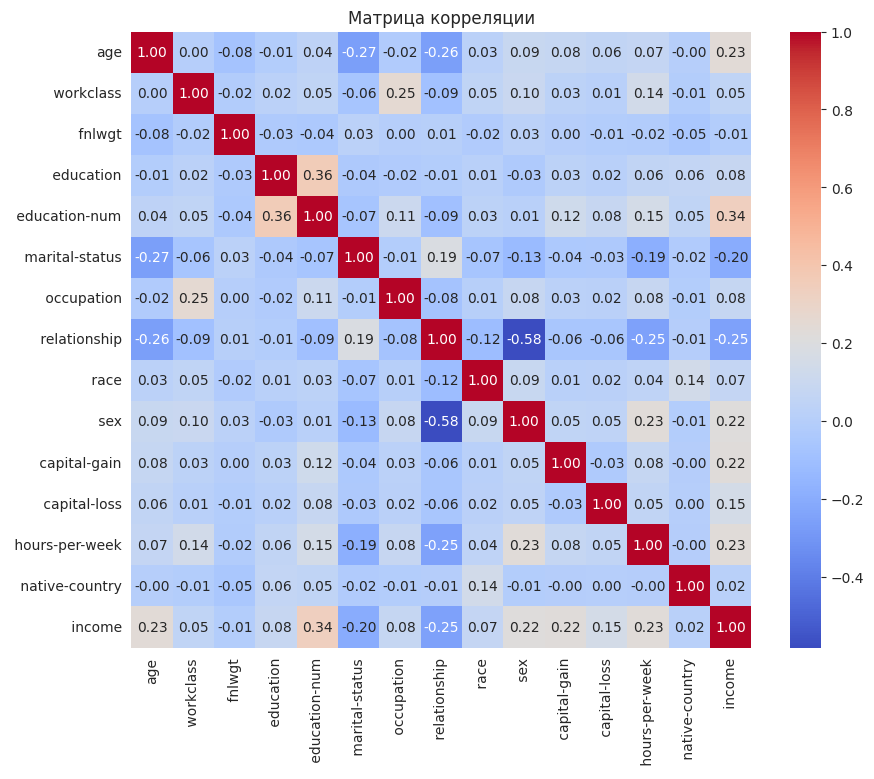

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Матрица корреляции')
plt.show()

income связан с age, education-num, marital-status, relation-ship, sex, hours per week

boxplot не нужен, так как всего 2 значения в столбце, и нет ни одного пустого

In [33]:
x = df[['age', ' education-num', ' marital-status', ' relationship', ' sex', ' capital-gain', ' capital-loss',
        ' hours-per-week']]
y= df[' income']
x

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week
0,39,13,4,1,1,2174,0,40
1,50,13,2,0,1,0,0,13
2,38,9,0,1,1,0,0,40
3,53,7,2,0,1,0,0,40
4,28,13,2,5,0,0,0,40
...,...,...,...,...,...,...,...,...
32556,27,12,2,5,0,0,0,38
32557,40,9,2,0,1,0,0,40
32558,58,9,6,4,0,0,0,40
32559,22,9,4,3,1,0,0,20


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train)
print()
print(x_test)
print()
print(y_train)
print()
print(y_test)

       age   education-num   marital-status   relationship   sex  \
5514    33              13                4              1     0   
19777   36              11                2              0     1   
10781   58               5                5              1     1   
32240   21              11                2              0     1   
9876    27              10                0              1     1   
...    ...             ...              ...            ...   ...   
29802   47              13                2              0     1   
5390    31               8                0              4     0   
860     18               7                4              3     0   
15795   50               9                2              0     1   
23654   34              13                0              1     1   

        capital-gain   capital-loss   hours-per-week  
5514               0              0               50  
19777              0           1887               50  
10781             

In [35]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

coefficients = model.coef_[0]
intercept = model.intercept_

print("коэффициенты уравнения:")
for feature, coef in zip(x.columns, coefficients):
    print(feature, ':', coef)
print("intercept:", intercept)

коэффициенты уравнения:
age : 0.03374474324486724
 education-num : 0.3300751069605681
 marital-status : -0.24179538061001088
 relationship : -0.11778676969119287
 sex : 0.9244180865216766
 capital-gain : 0.0003136064574062022
 capital-loss : 0.0006631863206012496
 hours-per-week : 0.030085834087295336
intercept: [-7.54985533]


In [36]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nМетрики:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Метрики:
Accuracy: 0.8265008444649163
Precision: 0.7185332011892963
Recall: 0.4614894971355824
F1-score: 0.562015503875969


In [37]:
tn, fp, fn, tp = conf_matrix.ravel()

print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 4658
FP: 284
FN: 846
TP: 725


получилось хорошо. accuracy норм, precision норм, recal поменьше, f1 норм 